In [1]:
import pandas as pd
import numpy as np
import glob


In [2]:
# Load all Citi Bike CSV files from a folder (update path)
file_paths = glob.glob("/content/drive/MyDrive/Capstone /citibike_tripdata.csv")
df_list = [pd.read_csv(file) for file in file_paths if file.endswith('.csv')]

# Merge all files into one DataFrame
df_citibike = pd.concat(df_list, ignore_index=True)

# Convert datetime columns
df_citibike['started_at'] = pd.to_datetime(df_citibike['started_at'], errors='coerce')
df_citibike['ended_at'] = pd.to_datetime(df_citibike['ended_at'], errors='coerce')

# Convert station IDs to numeric (fix mixed types)
df_citibike["start_station_id"] = pd.to_numeric(df_citibike["start_station_id"], errors="coerce")
df_citibike["end_station_id"] = pd.to_numeric(df_citibike["end_station_id"], errors="coerce")

# Drop missing values (only for critical columns)
df_citibike.dropna(subset=['start_station_name', 'end_station_name', 'started_at', 'ended_at'], inplace=True)

# Remove duplicates
df_citibike.drop_duplicates(inplace=True)

# Create a new column for trip duration in minutes
df_citibike['trip_duration_min'] = (df_citibike['ended_at'] - df_citibike['started_at']).dt.total_seconds() / 60

# Remove unrealistic trips (less than 1 min or more than 3 hours)
df_citibike = df_citibike[(df_citibike['trip_duration_min'] >= 1) & (df_citibike['trip_duration_min'] <= 180)]

# Reset index
df_citibike.reset_index(drop=True, inplace=True)

# Save cleaned Citi Bike data
df_citibike.to_csv("cleaned_citibike_data.csv", index=False)

# Display summary
print("✔ Citi Bike Trip Data Cleaned Successfully!")
df_citibike.info()
df_citibike.head(100)


<ipython-input-2-69ea79ba93de>:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in file_paths if file.endswith('.csv')]


✔ Citi Bike Trip Data Cleaned Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119447 entries, 0 to 2119446
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    float64       
 6   end_station_name    object        
 7   end_station_id      float64       
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  trip_duration_min   float64       
dtypes: datetime64[ns](2), float64(7), object(5)
memory usage: 226.4+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_min
0,56BD148A05E26915,electric_bike,2025-01-01 22:19:06.324,2025-01-01 22:23:32.899,W 36 St & 7 Ave,6483.06,W 24 St & 7 Ave,6257.03,40.752149,-73.989539,40.744876,-73.995299,member,4.442917
1,700CCCDF00C08077,electric_bike,2025-01-09 15:20:43.991,2025-01-09 15:26:19.137,Broadway & E 19 St,5980.11,W 24 St & 7 Ave,6257.03,40.738290,-73.990060,40.744876,-73.995299,member,5.585767
2,B1A3FAFA5FE651CE,electric_bike,2025-01-01 12:54:26.571,2025-01-01 13:03:03.565,Jackson Ave & 46 Rd,6203.02,Crescent St & Broadway,6827.11,40.745248,-73.947333,40.763359,-73.928647,member,8.616567
3,9CB0F28054BA5EBC,electric_bike,2025-01-14 13:43:59.151,2025-01-14 13:49:04.543,Broadway & E 19 St,5980.11,W 24 St & 7 Ave,6257.03,40.738290,-73.990060,40.744876,-73.995299,member,5.089867
4,A1B8FDD4FAF0C2B2,electric_bike,2025-01-13 07:20:37.176,2025-01-13 07:29:18.015,Willis Ave & E 143 St,7798.02,1 Ave & E 110 St,7522.02,40.812299,-73.920370,40.792327,-73.938300,member,8.680650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6690FECECECACCBF,electric_bike,2025-01-05 07:05:16.824,2025-01-05 07:13:09.418,MacDougal St & Washington Sq,5797.01,W 24 St & 7 Ave,6257.03,40.732264,-73.998522,40.744876,-73.995299,member,7.876567
96,C002C7977442253F,electric_bike,2025-01-11 18:12:17.511,2025-01-11 18:18:00.681,Broadway & E 19 St,5980.11,W 24 St & 7 Ave,6257.03,40.738290,-73.990060,40.744876,-73.995299,member,5.719500
97,30D445A188F33096,electric_bike,2025-01-07 14:28:34.385,2025-01-07 14:34:15.637,Willis Ave & E 143 St,7798.02,Grand Concourse & E 156 St,7984.04,40.812299,-73.920370,40.823429,-73.924689,member,5.687533
98,0793CF26FA6B2BC8,electric_bike,2025-01-01 11:57:40.553,2025-01-01 12:17:52.140,E 182 St & Grand Concourse,8494.07,Frederick Douglass Blvd & W 145 St,7954.12,40.855910,-73.900510,40.823061,-73.941928,member,20.193117


In [3]:
# Load the Cultural dataset
cultural_path = "/content/drive/MyDrive/Capstone /Cultural.csv"
df_cultural = pd.read_csv(cultural_path)

# Display actual column names in the dataset
print("Actual Column Names:", df_cultural.columns.tolist())

# Show the first few rows
df_cultural.head(100)


Actual Column Names: ['Name', 'Neighborhood', 'Borough', 'Type', 'Summary']


,Name,Neighborhood,Borough,Type,Summary
0,Metropolitan Museum of Art,Museum Mile,Manhattan,Art,"One of the world's largest, and most visited a..."
1,Brooklyn Museum,Crown Heights,Brooklyn,Art,"Collections include American art, Egyptian, Cl..."
2,Staten Island Museum,West New Brighton,Staten Island,Multiple,"Natural history, art, history, science; locate..."
3,Bronx Museum of the Arts,Concourse Village,Bronx,Art,Focuses on contemporary and 20th-century art
4,Queens Museum,Corona,Queens,Art,Formerly Queens Museum of Art; includes a coll...
...,...,...,...,...,...
95,National Jazz Museum in Harlem,Harlem,Manhattan,Music,Harlem’s jazz history
96,Louis Armstrong House,Corona,Queens,Historic house,Home of musician Louis Armstrong
97,Rose Museum,Midtown Manhattan,Manhattan,Music,Chronicles the history Carnegie Hall from the ...
98,Enrico Caruso Museum of America,Homecrest,Brooklyn,Biographical,"website (http://www.enricocarusomuseum.com), o..."


In [4]:
# Create a new column with a full address for geocoding
df_cultural['Full_Address'] = df_cultural['Name'] + ", " + df_cultural['Neighborhood'] + ", " + df_cultural['Borough'] + ", New York, USA"

# Display sample addresses
df_cultural[['Name', 'Full_Address']].head(100)


,Name,Full_Address
0,Metropolitan Museum of Art,"Metropolitan Museum of Art, Museum Mile, Manha..."
1,Brooklyn Museum,"Brooklyn Museum, Crown Heights, Brooklyn, New ..."
2,Staten Island Museum,"Staten Island Museum, West New Brighton, State..."
3,Bronx Museum of the Arts,"Bronx Museum of the Arts, Concourse Village, B..."
4,Queens Museum,"Queens Museum, Corona, Queens, New York, USA"
...,...,...
95,National Jazz Museum in Harlem,"National Jazz Museum in Harlem, Harlem, Manhat..."
96,Louis Armstrong House,"Louis Armstrong House, Corona, Queens, New Yor..."
97,Rose Museum,"Rose Museum, Midtown Manhattan, Manhattan, New..."
98,Enrico Caruso Museum of America,"Enrico Caruso Museum of America, Homecrest, Br..."


In [5]:
# Check how many addresses are missing
missing_addresses = df_cultural['Full_Address'].isna().sum()
print(f"⚠️ Missing Addresses: {missing_addresses}")

# Drop rows with missing Full_Address (if too many are missing, we can manually add them)
df_cultural.dropna(subset=['Full_Address'], inplace=True)

# Reset index after dropping missing values
df_cultural.reset_index(drop=True, inplace=True)

print("✔ Missing addresses removed!")


⚠️ Missing Addresses: 2
✔ Missing addresses removed!


In [6]:
from geopy.geocoders import Nominatim
import time

# Initialize geocoder
geolocator = Nominatim(user_agent="nyc_cultural")

# Function to get coordinates
def get_coordinates(address):
    try:
        location = geolocator.geocode(address, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Apply geocoding (this may take some time)
df_cultural['Latitude'], df_cultural['Longitude'] = zip(*df_cultural['Full_Address'].apply(get_coordinates))

# Save updated dataset
df_cultural.to_csv("Cultural_with_LatLong.csv", index=False)

print("✔ Geocoding completed! Latitude & Longitude added.")
df_cultural.head(100)


✔ Geocoding completed! Latitude & Longitude added.


,Name,Neighborhood,Borough,Type,Summary,Full_Address,Latitude,Longitude
0,Metropolitan Museum of Art,Museum Mile,Manhattan,Art,"One of the world's largest, and most visited a...","Metropolitan Museum of Art, Museum Mile, Manha...",40.779440,-73.963382
1,Brooklyn Museum,Crown Heights,Brooklyn,Art,"Collections include American art, Egyptian, Cl...","Brooklyn Museum, Crown Heights, Brooklyn, New ...",40.674397,-73.944046
2,Staten Island Museum,West New Brighton,Staten Island,Multiple,"Natural history, art, history, science; locate...","Staten Island Museum, West New Brighton, State...",NaN,NaN
3,Bronx Museum of the Arts,Concourse Village,Bronx,Art,Focuses on contemporary and 20th-century art,"Bronx Museum of the Arts, Concourse Village, B...",NaN,NaN
4,Queens Museum,Corona,Queens,Art,Formerly Queens Museum of Art; includes a coll...,"Queens Museum, Corona, Queens, New York, USA",40.745877,-73.846746
...,...,...,...,...,...,...,...,...
95,Rose Museum,Midtown Manhattan,Manhattan,Music,Chronicles the history Carnegie Hall from the ...,"Rose Museum, Midtown Manhattan, Manhattan, New...",NaN,NaN
96,Enrico Caruso Museum of America,Homecrest,Brooklyn,Biographical,"website (http://www.enricocarusomuseum.com), o...","Enrico Caruso Museum of America, Homecrest, Br...",NaN,NaN
97,New York Public Library for the Performing Arts,Upper West Side,Manhattan,Art,"Exhibitions about the performing arts, located...",New York Public Library for the Performing Art...,NaN,NaN
98,Museum of Broadway,Midtown Manhattan,Manhattan,Broadway theatre,Museum dedicated to documenting the history an...,"Museum of Broadway, Midtown Manhattan, Manhatt...",NaN,NaN


In [7]:
missing_coords = df_cultural[df_cultural['Latitude'].isna()]
print(f"⚠️ Missing Coordinates: {missing_coords.shape[0]}")
missing_coords[['Name', 'Full_Address']].head(100)


⚠️ Missing Coordinates: 125


,Name,Full_Address
2,Staten Island Museum,"Staten Island Museum, West New Brighton, State..."
3,Bronx Museum of the Arts,"Bronx Museum of the Arts, Concourse Village, B..."
5,Weeksville Heritage Center,"Weeksville Heritage Center, Bedford–Stuyvesant..."
10,The Africa Center,"The Africa Center, Museum Mile, Manhattan, New..."
11,Lewis H. Latimer House,"Lewis H. Latimer House, Flushing, Queens, New ..."
...,...,...
172,Children's Cultural Center of Native America,"Children's Cultural Center of Native America, ..."
174,Girl Scout Museum,"Girl Scout Museum, Garment District, Manhattan..."
175,Lefferts Historic House,"Lefferts Historic House, Park Slope, Brooklyn,..."
177,Staten Island Children's Museum,"Staten Island Children's Museum, West New Brig..."


In [8]:
# Save the cleaned dataset to your system
file_path = "/content/drive/MyDrive/Capstone /Cultural_Cleaned.csv"
df_cultural.to_csv(file_path, index=False)

print(f"✔ Cultural dataset cleaned and saved successfully at: {file_path}")


✔ Cultural dataset cleaned and saved successfully at: /content/drive/MyDrive/Capstone /Cultural_Cleaned.csv


Public Parks & Recreation Areas Dataset

In [9]:
# Load the Parks dataset
df_parks = pd.read_csv("/content/drive/MyDrive/Capstone /Parks_Properties.csv")

# Display column names and first few rows
print("Column Names:", df_parks.columns.tolist())
df_parks.head(100)

Column Names: ['ACQUISITIONDATE', 'ACRES', 'ADDRESS', 'BOROUGH', 'CLASS', 'COMMUNITYBOARD', 'COUNCILDISTRICT', 'DEPARTMENT', 'EAPPLY', 'GISOBJID', 'GISPROPNUM', 'GlobalID', 'JURISDICTION', 'LOCATION', 'MAPPED', 'NAME311', 'NYS_ASSEMBLY', 'NYS_SENATE', 'OBJECTID', 'OMPPROPID', 'PARENTID', 'PERMIT', 'PERMITDISTRICT', 'PERMITPARENT', 'PIP_RATABLE', 'PRECINCT', 'RETIRED', 'SIGNNAME', 'SUBCATEGORY', 'TYPECATEGORY', 'US_CONGRESS', 'WATERFRONT', 'ZIPCODE', 'multipolygon']


,ACQUISITIONDATE,ACRES,ADDRESS,BOROUGH,CLASS,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,EAPPLY,GISOBJID,...,PIP_RATABLE,PRECINCT,RETIRED,SIGNNAME,SUBCATEGORY,TYPECATEGORY,US_CONGRESS,WATERFRONT,ZIPCODE,multipolygon
0,01/27/1916 12:00:00 AM,0.545,4901 BROADWAY,M,PARK,112,10,M-12,Dyckman House Museum,100003823.0,...,False,34.0,False,Dyckman House Museum,Historic House,Historic House Park,13.0,False,10034,MULTIPOLYGON (((-73.92305320407046 40.86718368...
1,08/21/1936 12:00:00 AM,2.213,670 EAST 182 STREET,X,PARK,206,15,X-06,Belmont Playground,100004948.0,...,True,48.0,False,Belmont Playground,Neighborhood Plgd,Playground,15.0,False,10457,MULTIPOLYGON (((-73.88696663993288 40.85003709...
2,11/20/2002 12:00:00 AM,0.114,851 HORNADAY PLACE,X,PARK,206,15,X-06,Volky Garden & Flowers,100005124.0,...,False,48.0,False,Volky Garden & Flowers,Greenthumb,Garden,15.0,False,10460,MULTIPOLYGON (((-73.88234391814649 40.84707387...
3,01/19/2006 12:00:00 AM,6.219,78-01 57 AVENUE,Q,PARK,404,30,Q-04,Elmhurst Park,100000211.0,...,True,110.0,False,Elmhurst Park,Neighborhood Park,Community Park,6.0,False,11373,MULTIPOLYGON (((-73.88436854859785 40.72890922...
4,07/10/1902 12:00:00 AM,3.312,76-01 FDR DRIVE,M,PARK,108,5,M-08,John Jay Park,100004745.0,...,True,19.0,False,John Jay Park,Neighborhood Plgd,Community Park,12.0,False,10021,MULTIPOLYGON (((-73.94903734207423 40.76900910...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,08/21/2001 12:00:00 AM,12.224,1121 VIELE AVENUE,X,PARK,202,17,X-02,Barretto Point Park,100003965.0,...,True,41.0,False,Barretto Point Park,Neighborhood Park,Neighborhood Park,14.0,True,10474,MULTIPOLYGON (((-73.88722954312396 40.80426974...
96,12/28/2018 12:00:00 AM,1.377,237 MAPLE STREET,B,PARK,309,40,B-09,NaN,100042699.0,...,False,71.0,False,Maple Street Community Garden,Maple Street Community Garden,Neighborhood Park,9.0,False,11225,MULTIPOLYGON (((-73.9526606084359 40.660777885...
97,09/14/2022 12:00:00 AM,0.292,NaN,Q,PARK,408,24,Q-08,NaN,100042619.0,...,False,107.0,False,Legacy Park,NaN,Playground,6.0,False,11367,MULTIPOLYGON (((-73.81208325724086 40.73037093...
98,02/09/2018 12:00:00 AM,0.054,NaN,M,PARK,103,2,M-03,NaN,100036978.0,...,NaN,9.0,False,Sage Garden,NaN,Garden,10.0,False,10009,MULTIPOLYGON (((-73.98082609012458 40.72295590...


In [10]:
# Select only necessary columns
df_parks_cleaned = df_parks[['NAME311', 'ADDRESS', 'BOROUGH']].copy()

# Rename columns for clarity
df_parks_cleaned.rename(columns={'NAME311': 'Name', 'ADDRESS': 'Address', 'BOROUGH': 'Borough'}, inplace=True)

# Display cleaned structure
df_parks_cleaned.head(100)


,Name,Address,Borough
0,Dyckman House Museum,4901 BROADWAY,M
1,Belmont Playground,670 EAST 182 STREET,X
2,Volky Garden & Flowers,851 HORNADAY PLACE,X
3,Elmhurst Park,78-01 57 AVENUE,Q
4,John Jay Park,76-01 FDR DRIVE,M
...,...,...,...
95,Barretto Point Park,1121 VIELE AVENUE,X
96,Maple Street Community Garden,237 MAPLE STREET,B
97,Legacy Park,NaN,Q
98,Sage Garden,NaN,M


In [11]:
# Check missing values in Address
missing_addresses = df_parks_cleaned['Address'].isna().sum()
print(f"⚠️ Missing Addresses: {missing_addresses}")

# Drop rows with missing addresses if needed
df_parks_cleaned.dropna(subset=['Address'], inplace=True)

# Reset index
df_parks_cleaned.reset_index(drop=True, inplace=True)

print("✔ Missing addresses removed!")


⚠️ Missing Addresses: 840
✔ Missing addresses removed!


In [ ]:
import time
from geopy.geocoders import Nominatim

# Initialize geocoder with unique user-agent
geolocator = Nominatim(user_agent="nyc_parks_unique", timeout=10)

# Clean up special characters from address
df_parks_cleaned['Full_Address'] = df_parks_cleaned['Address'] + ", " + df_parks_cleaned['Borough']
df_parks_cleaned['Full_Address'] = df_parks_cleaned['Full_Address'].str.replace(r'[^\w\s,]', '', regex=True)

# Function to get coordinates with delay
def get_coordinates(address):
    try:
        time.sleep(1)  # Add delay to avoid rate limiting
        location = geolocator.geocode(address, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Apply geocoding
df_parks_cleaned['Latitude'], df_parks_cleaned['Longitude'] = zip(*df_parks_cleaned['Full_Address'].apply(get_coordinates))

# Save to file
file_path = "/content/drive/MyDrive/Capstone /Parks_Cleaned.csv"
df_parks_cleaned.to_csv(file_path, index=False)

print(f"✔ Parks dataset cleaned and saved at: {file_path}")
print(df_parks_cleaned.head(100))


In [35]:
# Drop rows with missing Latitude and Longitude
df_parks_cleaned.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Reset index after dropping rows
df_parks_cleaned.reset_index(drop=True, inplace=True)

# Display cleaned data
print(df_parks_cleaned.head(10))

# Save cleaned file (update path if needed)
file_path = "/content/drive/MyDrive/Capstone /Parks.csv"
df_parks_cleaned.to_csv(file_path, index=False)

print(f"✔ Parks dataset cleaned and saved successfully at: {file_path}")


                     Name                      Address Borough   Latitude  \
0    Dyckman House Museum                4901 BROADWAY       M  53.773000   
1  Volky Garden & Flowers           851 HORNADAY PLACE       X  40.846584   
2           Elmhurst Park              78-01 57 AVENUE       Q  53.260972   
3           John Jay Park              76-01 FDR DRIVE       M  40.795342   
4    Jardin De La Familia  1507-1517 WASHINGTON AVENUE       X  45.600583   
5             Straus Park                2761 BROADWAY       M -33.926051   
6    Commodore Barry Park               65 PARK AVENUE       B  53.407664   
7     Brighton Playground        126 BRIGHTWATER COURT       B  40.575712   
8  Tottenville Shore Park       117 1/2 HOPPING AVENUE       R  40.509169   
9           Midland Field           333 MIDLAND AVENUE       R  33.799388   

    Longitude                   Full_Address  
0   -2.482695               4901 BROADWAY, M  
1  -73.882290          851 HORNADAY PLACE, X  
2 -110.0223

In [22]:
import pandas as pd

# Load the Landmarks dataset using pd.read_excel
# For older pandas versions, try without the encoding argument:
df_landmarks = pd.read_excel("/content/drive/MyDrive/Capstone /New_York_Tourist_Locations.xlsx")

# If the above fails or you encounter encoding issues,
# you might need to install/update openpyxl:
# !pip install openpyxl --upgrade
# Then try:
# df_landmarks = pd.read_excel("/content/drive/MyDrive/Capstone /New_York_Tourist_Locations.xlsx", engine='openpyxl')

# Display column names and first few rows
print("Column Names:", df_landmarks.columns.tolist())
df_landmarks.head(100)

Column Names: ['Tourist_Spot', 'Address', 'Zipcode']


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Tourist_Spot,Address,Zipcode
0,47th Street - The Diamond District,"47th St. betw. Fifth & Sixth Aves. Manhattan, ...",10036
1,9/11 Memorial & Museum,World Trade Center (museum: 180 Greenwich St.)...,10007
2,Abyssinian Baptist Church,"132 Odell Clark Place New York, NY 10030, Harlem",10030
3,Alice Austen House Museum,"2 Hylan Blvd. Staten Island, NY 10305, Staten ...",10305
4,Alice Tully Hall,"1941 Broadway Manhattan, NY 10023, Upper West ...",10023
...,...,...,...
95,Parachute Jump,Boardwalk W. (bet. W. 16th and W. 19th Sts.) B...,11224
96,Paradise Theater,"2403 Grand Concourse Bronx, NY 10468, Fordham",10468
97,Pepsi-Cola Sign,"30-99 48th AvenueNew York, NY 11101, Long Isla...",11101
98,Plymouth Church of the Pilgrims,"75 Hicks St Brooklyn, NY 11201, Brooklyn Heights",11201


In [28]:
print(df_landmarks.columns.tolist())


['Tourist_Spot', 'Address', 'Zipcode']


In [30]:
# Keep only relevant columns
df_landmarks_cleaned = df_landmarks[['Tourist_Spot', 'Address', 'Zipcode']].copy()

# Rename for consistency
df_landmarks_cleaned.rename(columns={'Tourist_Spot': 'Name', 'Address': 'Address', 'Zipcode': 'Zipcode'}, inplace=True)

# Display structure
print(df_landmarks_cleaned.head(100))


                                  Name  \
0   47th Street - The Diamond District   
1               9/11 Memorial & Museum   
2            Abyssinian Baptist Church   
3            Alice Austen House Museum   
4                     Alice Tully Hall   
..                                 ...   
95                      Parachute Jump   
96                    Paradise Theater   
97                     Pepsi-Cola Sign   
98     Plymouth Church of the Pilgrims   
99                            Poe Park   

                                              Address Zipcode  
0   47th St. betw. Fifth & Sixth Aves. Manhattan, ...   10036  
1   World Trade Center (museum: 180 Greenwich St.)...   10007  
2    132 Odell Clark Place New York, NY 10030, Harlem   10030  
3   2 Hylan Blvd. Staten Island, NY 10305, Staten ...   10305  
4   1941 Broadway Manhattan, NY 10023, Upper West ...   10023  
..                                                ...     ...  
95  Boardwalk W. (bet. W. 16th and W. 19th Sts.

In [32]:
from geopy.geocoders import Nominatim
import time

# Initialize geocoder with unique user-agent
geolocator = Nominatim(user_agent="nyc_landmarks", timeout=10)

# Create full address using Address + Zipcode
df_landmarks_cleaned['Full_Address'] = df_landmarks_cleaned['Address'] + ", NY " + df_landmarks_cleaned['Zipcode'].astype(str) + ", USA"

# Function to get coordinates with delay
def get_coordinates(address):
    try:
        time.sleep(1)  # Add delay to avoid rate limits
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Print status
print("🚀 Starting geocoding...")

# Apply geocoding
df_landmarks_cleaned['Latitude'], df_landmarks_cleaned['Longitude'] = zip(*df_landmarks_cleaned['Full_Address'].apply(get_coordinates))

# Print completion status
print("✔ Geocoding completed!")

# Drop temporary columns
df_landmarks_cleaned.drop(columns=['Full_Address'], inplace=True)

# Save to system (update username)
file_path = "/content/drive/MyDrive/Capstone /Landmarks_Cleaned.csv"
df_landmarks_cleaned.to_csv(file_path, index=False)

# Print success message with path
print(f"✔ Landmarks dataset cleaned and saved successfully at: {file_path}")

# Display sample data
print("\nSample cleaned data:")
print(df_landmarks_cleaned.head(100))


🚀 Starting geocoding...
✔ Geocoding completed!
✔ Landmarks dataset cleaned and saved successfully at: /content/drive/MyDrive/Capstone /Landmarks_Cleaned.csv

Sample cleaned data:
                                  Name  \
0   47th Street - The Diamond District   
1               9/11 Memorial & Museum   
2            Abyssinian Baptist Church   
3            Alice Austen House Museum   
4                     Alice Tully Hall   
..                                 ...   
95                      Parachute Jump   
96                    Paradise Theater   
97                     Pepsi-Cola Sign   
98     Plymouth Church of the Pilgrims   
99                            Poe Park   

                                              Address Zipcode   Latitude  \
0   47th St. betw. Fifth & Sixth Aves. Manhattan, ...   10036        NaN   
1   World Trade Center (museum: 180 Greenwich St.)...   10007        NaN   
2    132 Odell Clark Place New York, NY 10030, Harlem   10030        NaN   
3   2 Hylan 

In [33]:
# Drop rows with missing Latitude and Longitude
df_landmarks_cleaned.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Reset index after dropping rows
df_landmarks_cleaned.reset_index(drop=True, inplace=True)

# Display updated DataFrame
print(df_landmarks_cleaned.head(10))

# Save the cleaned file
file_path = "/content/drive/MyDrive/Capstone /Landmarks.csv"
df_landmarks_cleaned.to_csv(file_path, index=False)

print(f"✔ Cleaned dataset saved at: {file_path}")


                                                Name  \
0                          Alice Austen House Museum   
1                                  Flatiron Building   
2                                        Museum Mile   
3                                            The PIT   
4                           Verrazano-Narrows Bridge   
5              World Trade Center Transportation Hub   
6  Washington Street between Front and Water Streets   
7                  St. Ann & The Holy Trinity Church   
8                              Czech Center New York   
9                           St. Bartholomew's Church   

                                             Address Zipcode   Latitude  \
0  2 Hylan Blvd. Staten Island, NY 10305, Staten ...   10305  40.600442   
1       175 5th Ave Manhattan, NY, Flatiron District   10010  40.741059   
2        Fifth Avenue Manhattan, NY, Upper East Side   10128  40.766023   
3     123 E 24th St Manhattan, NY, Flatiron District   10010  40.740502   
4       

 Step 1: Citi Bike Data EDA

In [36]:
import pandas as pd

# Load Citi Bike Data
df_citibike = pd.read_csv("/content/drive/MyDrive/Capstone /citibike_tripdata.csv")

# Check structure
print(df_citibike.info())
print(df_citibike.head())


<ipython-input-36-9b72ac49cd5a>:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_citibike = pd.read_csv("/content/drive/MyDrive/Capstone /citibike_tripdata.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124475 entries, 0 to 2124474
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 210.7+ MB
None
            ride_id  rideable_type               started_at  \
0  56BD148A05E26915  electric_bike  2025-01-01 22:19:06.324   
1  700CCCDF00C08077  electric_bike  2025-01-09 15:20:43.991   
2  B1A3FAFA5FE651CE  electric_bike  2025-01-01 12:54:26.571   
3  9CB0F28054BA5EBC  electric_bike  2025-01-14 13:43:59.151   
4  A1B8FDD4FAF0C2B

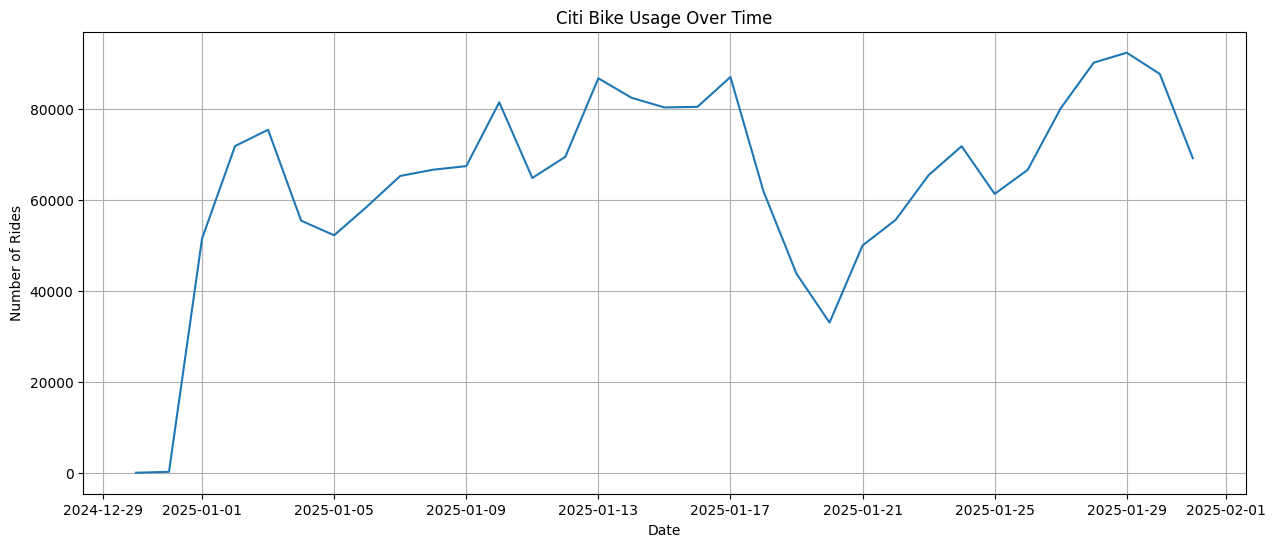

In [40]:
import matplotlib.pyplot as plt

# Convert datetime column
df_citibike['started_at'] = pd.to_datetime(df_citibike['started_at'])

# Group by date
rides_per_day = df_citibike.groupby(df_citibike['started_at'].dt.date).size()

# Plot the trend
plt.figure(figsize=(15, 6))
rides_per_day.plot()
plt.title('Citi Bike Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.grid()
plt.show()


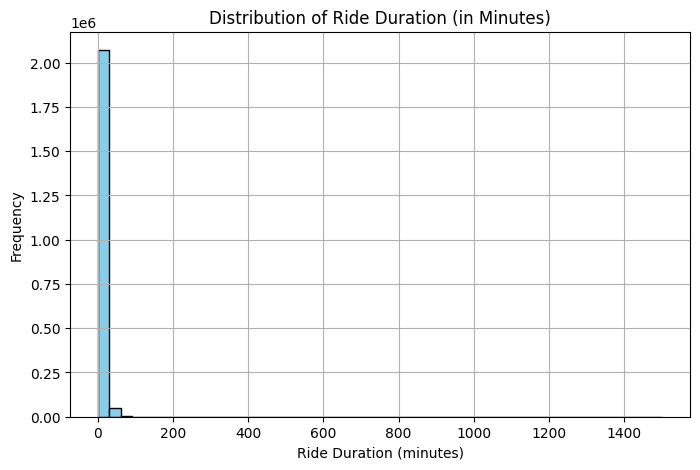

In [41]:
# Convert duration to minutes
df_citibike['ride_duration'] = (pd.to_datetime(df_citibike['ended_at']) - pd.to_datetime(df_citibike['started_at'])).dt.total_seconds() / 60

plt.figure(figsize=(8, 5))
df_citibike['ride_duration'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Ride Duration (in Minutes)')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-42-20fbfce67a08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_citibike, x='rideable_type', palette='viridis')


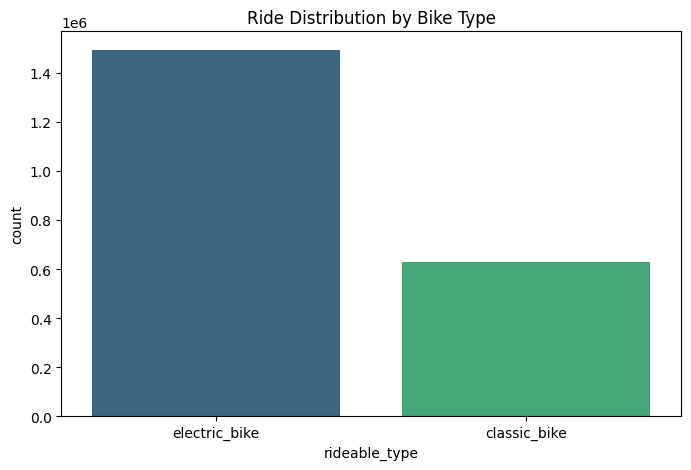

In [42]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df_citibike, x='rideable_type', palette='viridis')
plt.title('Ride Distribution by Bike Type')
plt.show()


<ipython-input-43-3f3aa3f7b831>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df_citibike, palette='plasma')


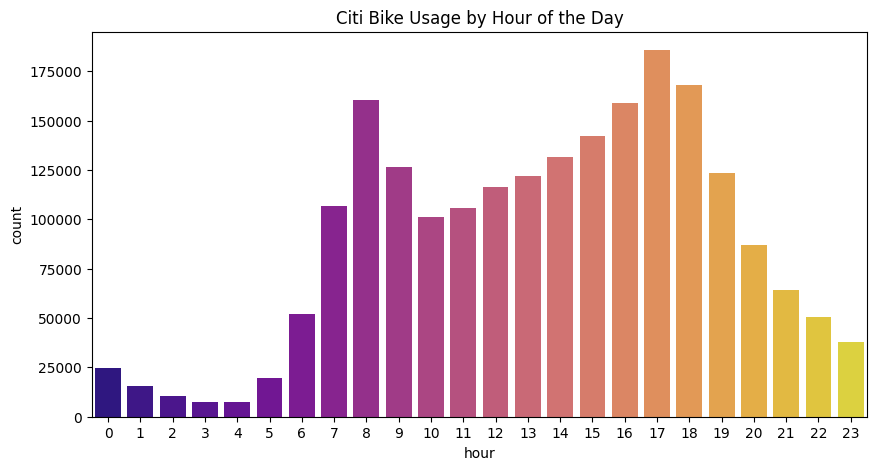

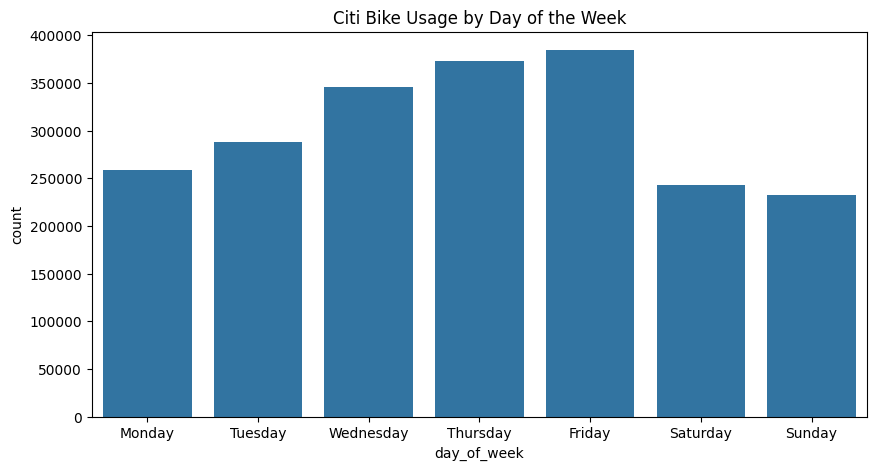

In [43]:
# Extract hour and day
df_citibike['hour'] = df_citibike['started_at'].dt.hour
df_citibike['day_of_week'] = df_citibike['started_at'].dt.day_name()

# Peak hours
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df_citibike, palette='plasma')
plt.title('Citi Bike Usage by Hour of the Day')
plt.show()

# Peak days
plt.figure(figsize=(10, 5))
sns.countplot(x='day_of_week', data=df_citibike, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Citi Bike Usage by Day of the Week')
plt.show()


In [44]:
# Top start stations
top_start_stations = df_citibike['start_station_name'].value_counts().head(10)
print("Top 10 Start Stations:\n", top_start_stations)

# Top end stations
top_end_stations = df_citibike['end_station_name'].value_counts().head(10)
print("\nTop 10 End Stations:\n", top_end_stations)


Top 10 Start Stations:
 start_station_name
W 21 St & 6 Ave             8943
W 31 St & 7 Ave             7557
Pier 61 at Chelsea Piers    7526
Lafayette St & E 8 St       7334
11 Ave & W 41 St            6932
Broadway & E 14 St          6626
Ave A & E 14 St             6594
E 33 St & 1 Ave             6587
9 Ave & W 33 St             6555
University Pl & E 14 St     6343
Name: count, dtype: int64

Top 10 End Stations:
 end_station_name
W 21 St & 6 Ave             8989
W 31 St & 7 Ave             7604
Pier 61 at Chelsea Piers    7540
Lafayette St & E 8 St       7324
11 Ave & W 41 St            6940
9 Ave & W 33 St             6644
Broadway & E 14 St          6593
E 33 St & 1 Ave             6587
Ave A & E 14 St             6497
University Pl & E 14 St     6429
Name: count, dtype: int64
